In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

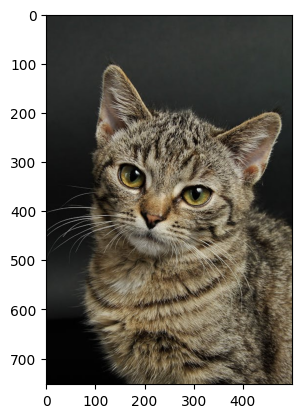

In [70]:
img = cv2.imread('/content/cat.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

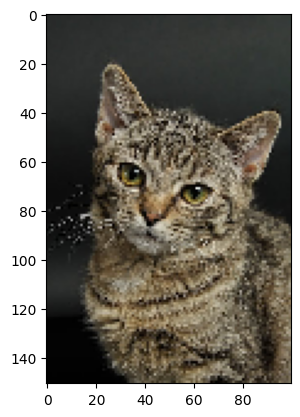

In [62]:
transform_img = cv2.resize(img, None, fx=0.2, fy=0.2)

plt.imshow(transform_img)
plt.show()

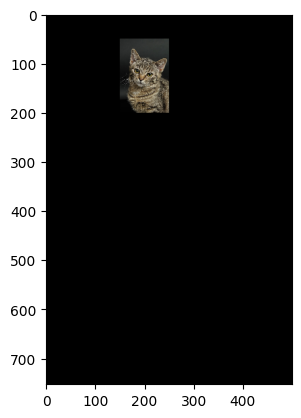

In [63]:
r, c, _ = img.shape
trans_mat = np.float32([[1, 0, 150], [0, 1, 50]])
transform_img = cv2.warpAffine(transform_img, trans_mat, (c, r))

plt.imshow(transform_img)
plt.show()

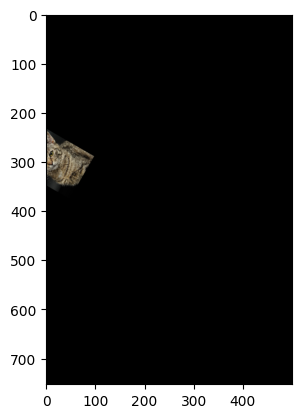

In [64]:
rot_mat = cv2.getRotationMatrix2D((c/2, r/2), 60, 1)
transform_img = cv2.warpAffine(transform_img, rot_mat, (c, r))

plt.imshow(transform_img)
plt.show()

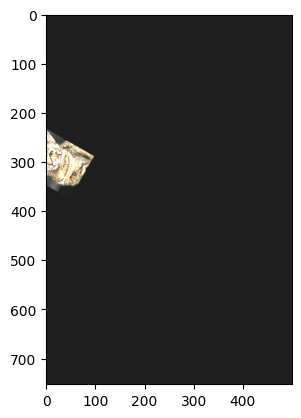

In [65]:
transform_img = cv2.convertScaleAbs(transform_img, alpha=1.8, beta=30)

plt.imshow(transform_img)
plt.show()

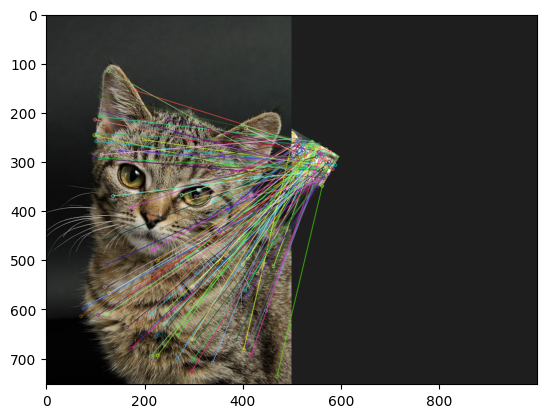

In [66]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(transform_img, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_result = cv2.drawMatches(img, kp1, transform_img, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_result)
plt.show()

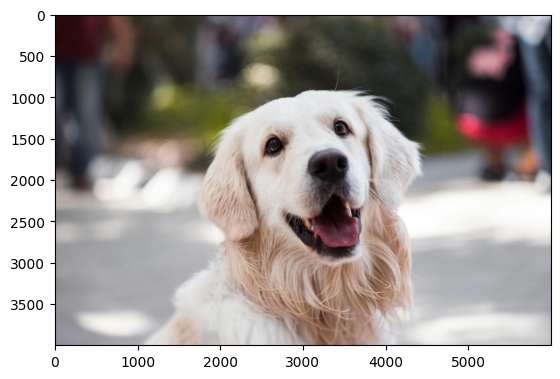

In [71]:
img_d = cv2.imread('/content/dog.jpg')
img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)

plt.imshow(img_d)
plt.show()

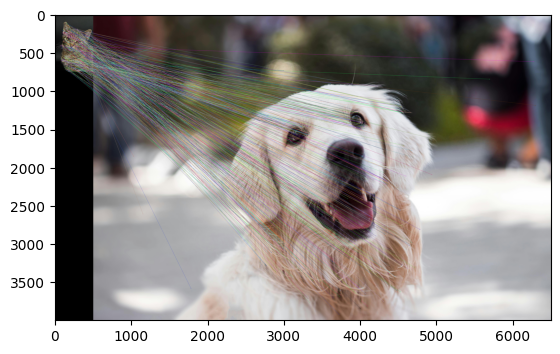

In [72]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(img_d, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_result = cv2.drawMatches(img, kp1, img_d, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_result)
plt.show()

SIFT can detect similar local features between different images, but it cannot differenciate between totally different objects like a cat and a dog.